# Исследование рынка заведений общественного питания Москвы для принятия решения открытия нового заведения

## Цель проекта

Провести исследование рынка общественного питания города Москвы и определить перспективность открытия небольшого кафе в г. Москва с обслуживанием гостей роботами-официантами.




## План проекта

2.1. Изучение и предобработка данных

- Обзор данных
- Предобработка данных


2.2. Исследовательский анализ данных

- Исследование соотношения видов объектов общественного питания по количеству. Построение графика.
- Исследование соотношения сетевых и несетевых заведений по количеству. Построение графика.
- Определение для какого вида объекта общественного питания характерно сетевое распространение
- Определение того, что характерно для сетевых заведений
- Описание среднего количества посадочных мест для каждого вида объекта общественного питания¶
- Выделение в отдельный столбец информации об улице из столбца address
- Построение графика топ-10 улиц по количеству объектов общественного питания с использованием внешней информации
- Определение числа улиц с одним объектом общественного питания с использованием внешней информации
- Изучение распределения количества посадочных мест для улиц с большим количеством объектов общественного питания. Выявление закономерностей

2.3. Вывод


2.4. Презентация

## Описание данных

Таблица rest_data:

id — идентификатор объекта;

object_name — название объекта общественного питания;

chain — сетевой ресторан;

object_type — тип объекта общественного питания;

address — адрес;

number — количество посадочных мест


## Изучение и предобработка данных

### Обзор данных

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats as st
import string
import requests
import re
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.options.mode.chained_assignment = None

In [2]:
# прочитаем датасет, посмотрим общую информацию, проверим на пропуски, дубликаты, уникальные названия
df = pd.read_csv('/datasets/......csv')

display(df.sample(n=20, random_state=123))
print('*'*50)
df.info()
print('*'*50)
#print('Пропусков:', df.isna().sum())

print('Дубликатов:', df.duplicated().sum())
print('*'*50)
display(df['chain'].unique())
print('*'*50)
display(df['object_type'].unique())

,id,object_name,chain,object_type,address,number
12208,191646,259,нет,кафе,"город Москва, Вятская улица, дом 41Г",24
1392,69174,Subway,да,предприятие быстрого обслуживания,"город Москва, 3-я улица Ямского Поля, дом 13",35
2265,26471,Ресторан «КАБАНЧИК»,нет,ресторан,"город Москва, улица Красина, дом 27, строение 1",260
10961,185893,МиЛя,нет,кафе,"город Москва, Новоалексеевская улица, дом 12, ...",27
6760,144790,КАФЕ НА АЗС,нет,закусочная,"город Москва, Волоколамское шоссе, дом 139, ст...",10
13722,208236,Kuzina,нет,кафе,"город Москва, Братиславская улица, дом 13, кор...",8
1592,26993,Сосны,нет,ресторан,"город Москва, 1-я линия Хорошёвского Серебряно...",30
888,76569,Brut Bar,нет,кафе,"город Москва, Петровский бульвар, дом 17/1",45
8898,86794,Кафе «Баскин Роббинс»,да,кафе,"город Москва, улица Мичуринский Проспект, Олим...",10
11962,94947,Восточный базар,да,ресторан,"город Москва, Ходынский бульвар, дом 4",50


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
**************************************************
Дубликатов: 0
**************************************************


array(['нет', 'да'], dtype=object)

**************************************************


array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [3]:
# проверим сколько объектов имеют количество мест равным нулю
zero_number = df.query('number == 0').value_counts()
display(zero_number)

id      object_name  chain  object_type                        address                                                                  number
20410   СЕРДОЛИК-Ю   нет    бар                                город Москва, Профсоюзная улица, дом 61А                                 0         1
200752  Выпечка      нет    закусочная                         город Москва, Старый Петровско-Разумовский проезд, дом 1/23, строение 1  0         1
200997  Закусочная   нет    закусочная                         город Москва, Люблинская улица, дом 112, строение 3                      0         1
200792  ШАУРМА       нет    предприятие быстрого обслуживания  город Москва, Профсоюзная улица, дом 2/22                                0         1
200773  Донеретто    нет    закусочная                         город Москва, Уральская улица, дом 1                                     0         1
                                                                                                                     

Вывод:


- Всего в данных 15366 строк о заведениях Москвы.
- Полных дубликатов нет. 
- Пропусков нет.
- Целесообразно привести к нижнему регистру названия, адрес и тип объектов, заменить 'ё' на 'е', и затем еще  раз проверить на дубликаты
- Видим объекты общественного питания с количеством посадочных мест равным нулю, их количество 1621 ед. (около 11 % от общего количества объектов). Скорее всего это заведения работают  только на доставку, самовывоз. Поэтому удалять их не будем, они могут пригодиться для дальнейшего анализа.

### Предобработка данных

In [4]:
# приводим к нижнему регистру поля 'object_name', 'object_type', 'address', заменим 'ё' на 'е'
# проверим результат
df['object_name'] = df['object_name'].str.lower()
df['object_type'] = df['object_type'].str.lower()
df['address'] = df['address'].str.lower()
df['address'] = df['address'].str.replace('ё','е') 
df['object_name'] = df['object_name'].str.strip()  # удаляем пробельные символы в начале и в конце строки названия объекта
display(df.sample(10))

,id,object_name,chain,object_type,address,number
5973,134575,kfc,да,предприятие быстрого обслуживания,"город москва, поречная улица, дом 10",0
6671,139499,dunkin donuts (азия box - бургер box),нет,ресторан,"город москва, площадь киевского вокзала, дом 2",50
5083,29252,столовая 1908,нет,столовая,"город москва, привольная улица, дом 41",200
11877,181686,суши wok,да,предприятие быстрого обслуживания,"город москва, 9-я парковая улица, дом 59, корп...",3
9542,164788,пиццерия,нет,предприятие быстрого обслуживания,"город москва, домодедовская улица, дом 28",0
8633,79988,пицца экспресс,да,предприятие быстрого обслуживания,"город москва, город щербинка, симферопольское ...",9
8149,26077,m cafe хинкальная,да,ресторан,"город москва, большой саввинский переулок, дом...",150
7576,29332,школа 420,нет,столовая,"город москва, шипиловская улица, дом 18, корпус 2",75
4636,28903,столовая гоу сош № 499,нет,столовая,"город москва, батайский проезд, дом 23",240
14984,213210,бар «винный бар»,нет,бар,"город москва, улица сергея макеева, дом 9, кор...",46


In [5]:
# еще раз проверим наличие дубликатов
df.duplicated().sum()

0

In [6]:
# удалим столбец 'id' и проверим на дубликаты
df_one = df.drop(['id'], axis=1)
df_one.duplicated().sum()

85

In [7]:
# удаляем дубликаты и проверим
df = df_one.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

In [8]:
# Приведём поле 'chain' к логическому типу данных:

df['chain'] = df['chain'].map({'да': True, 'нет': False})
display(df.head(5))
print(df.info())

,object_name,chain,object_type,address,number
0,сметана,False,кафе,"город москва, улица егора абакумова, дом 9",48
1,родник,False,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35
2,кафе «академия»,False,кафе,"город москва, абельмановская улица, дом 6",95
3,пиццетория,True,кафе,"город москва, абрамцевская улица, дом 1",40
4,кафе «вишневая метель»,False,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15281 entries, 0 to 15280
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   object_name  15281 non-null  object
 1   chain        15281 non-null  bool  
 2   object_type  15281 non-null  object
 3   address      15281 non-null  object
 4   number       15281 non-null  int64 
dtypes: bool(1), int64(1), object(3)
memory usage: 492.6+ KB
None


Вывод:

Привели к нижнему регистру названия, адрес и тип объектов, заменили в адресе 'ё' на 'е', удалили пробельные символы в начале и в конце строки названия объекта и еще раз проверили на дубликаты. Дубликаты не обнаружили. Хорошо. Для удобства дальнейшей работы с данными тип поля "chain"  заменили на boolean.  Теперь можно приступать к исследованию.

## Исследовательский анализ данных

### Исследование соотношения видов объектов общественного питания по количеству. Построение графика.

In [9]:
# выделим обьекты с разделением по видам обьектов в сводную таблицу
# считаем число видов объектов общественного питания
object_types = (
    df.groupby('object_type')
             .agg({'object_type':'count', 'number': 'mean'})
             .rename(columns={'object_type':'count'})
             .sort_values('count', ascending=False)
    .reset_index()
)
object_types['number'] = object_types['number'].round(0).astype('int')
# добавим столбец с соотношением заведений в процентах
# lambda переводим значения столбца в проценты
object_types['percent'] =  ((object_types['count']/object_types['count'].sum()).round(2)).apply(lambda x: f"{x:1.1%}")
display(object_types)


,object_type,count,number,percent
0,кафе,6071,40,40.0%
1,столовая,2584,130,17.0%
2,ресторан,2282,97,15.0%
3,предприятие быстрого обслуживания,1897,21,12.0%
4,бар,855,44,6.0%
5,буфет,576,51,4.0%
6,кафетерий,395,9,3.0%
7,закусочная,348,8,2.0%
8,магазин (отдел кулинарии),273,6,2.0%


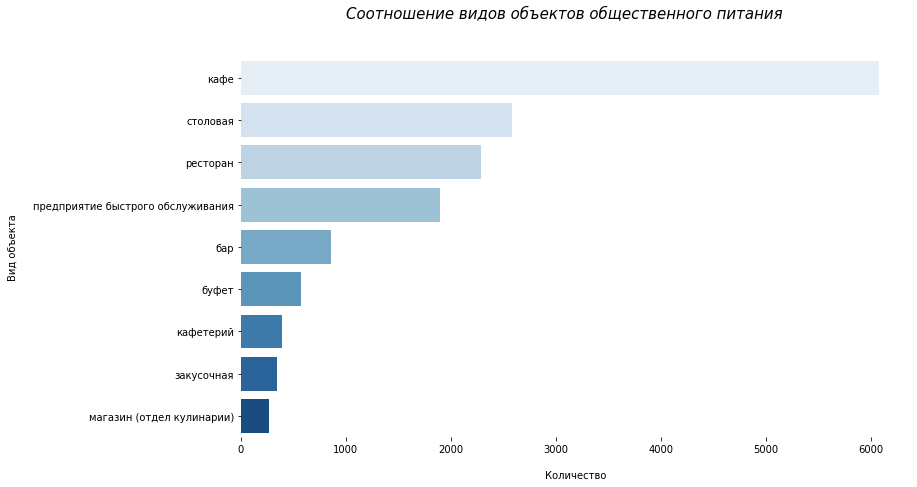

In [10]:
# строим график
fig, ax = plt.subplots(figsize=(12,7))
fig.suptitle('Соотношение видов объектов общественного питания', fontsize=15, style="italic")



sns.countplot(y="object_type", 
              data=df, palette="Blues",
              order=df['object_type'].value_counts().index)

sns.despine(left=True, bottom=True)

ax.set_ylabel('Вид объекта\n')
ax.set_xlabel('\nКоличество');



### Вывод

Почти 40% объектов нашей базы относятся к типу "кафе"
Следующие по численности столовые (17%), рестораны (15%) и предприятия быстрого обслуживания (13 %)

Таким образом, формат кафе является по нашим данным в Москве наиболее популярным форматом заведения. Следовательно, на данном этапе исследования тип объекта общесьтвенного питания в виде "кафе" _ наиболее удачный. Но не будем торопиться с выводами. Продолжим исследование.

Наименьшее количество кафетериев, закусочных и отделов кулинарии в магазинах (в порядке убывания количества).

### Исследование соотношения сетевых и несетевых заведений по количеству. Построение графика.

In [11]:
# считаем количество сетевых и несетевых объектов
chain_group = df.groupby('chain').agg(count=('object_type','count')).reset_index()

# добавим столбец с процентами соотношения сетевой не сетевой
# lambda переводим значения столбца в проценты
chain_group['percent'] =  (chain_group['count']/chain_group['count'].sum()).apply(lambda x: f"{x:.1%}")

display(chain_group)

,chain,count,percent
0,False,12317,80.6%
1,True,2964,19.4%


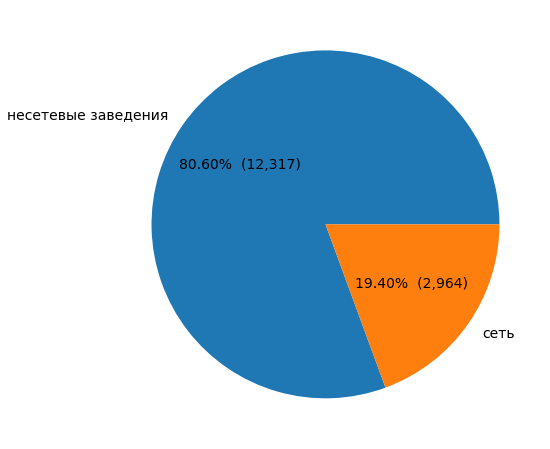

In [12]:
# построим круговую диаграмму
plt.figure(figsize=(8, 8))
plt.pie(chain_group['count'], labels=chain_group['chain'].map({True: 'сеть', False: 'несетевые заведения'}), 
        autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(chain_group['count'])/100), textprops={'fontsize': 14})
plt.show()

Вывод:

Несетевые объекты общественного питания занимают 80 % от общего количества исследуемых объектов. 

### Определение для какого вида объекта общественного питания характерно сетевое распространение

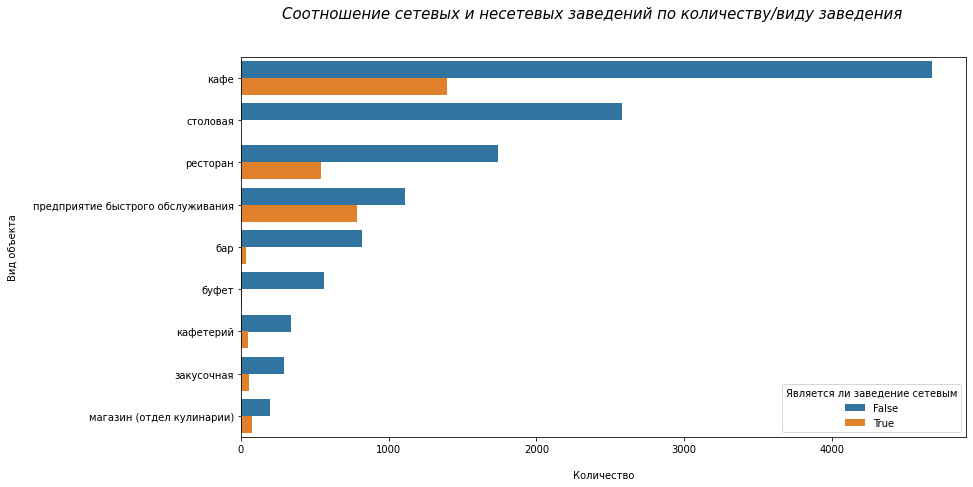

In [13]:
# строим график
fig, ax = plt.subplots(figsize=(13,7))
fig.suptitle('Соотношение сетевых и несетевых заведений по количеству/виду заведения', fontsize=15, style="italic")


sns.countplot(y="object_type", 
              hue="chain", 
              data=df, 
              order=df['object_type'].value_counts().index)

ax.legend(title='Является ли заведение сетевым')
ax.set_ylabel('Вид объекта\n')
ax.set_xlabel('\nКоличество');

In [14]:
rest_chain_group = df[df['chain']].groupby('object_type').agg(count=('object_type','count')).reset_index()
rest_type = df.groupby('object_type').agg(count=('object_type','count')).reset_index().sort_values('count', ascending=False)

# добавим в таблицу информацию об общем количестве заведений каждого типа
rest_chain_group = rest_chain_group.merge(rest_type, how='left', left_on='object_type', right_on='object_type')
rest_chain_group.columns = ['object_type', 'chain_count', 'total_count']

# расчитаем долю сетевых заведений каждого типа в процентах
rest_chain_group['chain_percent'] = round((rest_chain_group['chain_count'] / rest_chain_group['total_count']) * 100, 2)
rest_chain_group.sort_values('total_count', ascending=False, inplace=True)

display(rest_chain_group.sort_values('chain_count', ascending=False))

,object_type,chain_count,total_count,chain_percent
3,кафе,1396,6071,22.99
6,предприятие быстрого обслуживания,788,1897,41.54
7,ресторан,543,2282,23.79
5,магазин (отдел кулинарии),78,273,28.57
2,закусочная,56,348,16.09
4,кафетерий,52,395,13.16
0,бар,37,855,4.33
1,буфет,11,576,1.91
8,столовая,3,2584,0.12


### Вывод

Наблюдаем наибольшее количество сетевых заведений в сегменте "кафе" (1396 единиц), на втором месте предприятия быстрого обслуживания (791 ед.), на третьем рестораны (544 ед.). Первая тройка явно выделяется по количеству, по сравнению с другими видами объектов общественного питания. 

Стоит выделить абсолютного лидера в долевом отношении сетевых заведений к общему количеству - это предприятия быстрого обслуживания (41,13 %), на втором месте магазины (отдел кулинарии) - 28,57 %, и на третьем рестораны (23,81 %). Кафе на четвертом месте в процентном соотношении к общему количеству заведений данного типа (22,89 %)Пятерку замыкают закусочные (15,56 %).

Возможно есть хорошие перспективы развить сеть кафе, предприятий быстрого обслуживания и ресторанов, интересным может быть и продажи франшизы по данным категориям объектов ОП.

Интересно отметить, что  сетевых столовых практически нет, а количество сетевых буфетов и баров очень незначительно.

###  Определение того, что характерно для сетевых заведений

In [15]:
# Отсортируем только сетевые заведения

object_chain = df[df['chain']== True]
display(object_chain.head())
display(object_chain.shape)
display(object_chain['number'].describe())

,object_name,chain,object_type,address,number
3,пиццетория,True,кафе,"город москва, абрамцевская улица, дом 1",40
6,брусника,True,кафе,"город москва, переулок сивцев вражек, дом 6/2",10
13,алло пицца,True,кафе,"город москва, улица авиаторов, дом 14",32
16,суши wok,True,предприятие быстрого обслуживания,"город москва, азовская улица, дом 3",7
18,тануки,True,ресторан,"город москва, большая академическая улица, дом 65",160


(2964, 5)

count    2964.000000
mean       52.981107
std        57.152817
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: number, dtype: float64

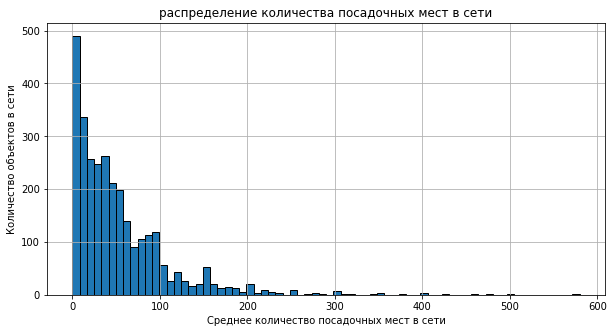

In [16]:
#посмотрим распределение по количеству посадочных мест
object_chain['number'].hist(bins=70, figsize=(10,5), ec='black')
plt.title('распределение количества посадочных мест в сети')
plt.xlabel('Среднее количество посадочных мест в сети')
plt.ylabel('Количество объектов в сети')
plt.show()

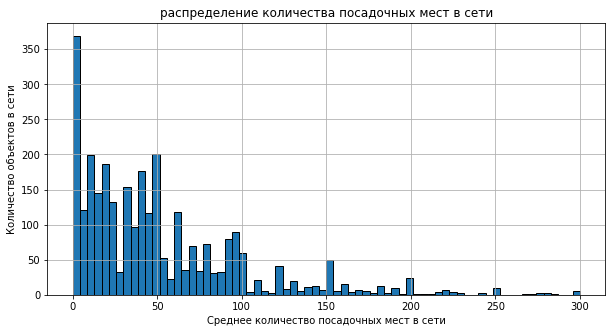

In [17]:
# посмотрим на распределение немного ближе
object_chain['number'].hist(bins=70, figsize=(10,5), ec='black', range=(0, 300))
plt.title('распределение количества посадочных мест в сети')
plt.xlabel('Среднее количество посадочных мест в сети')
plt.ylabel('Количество объектов в сети')
plt.show()

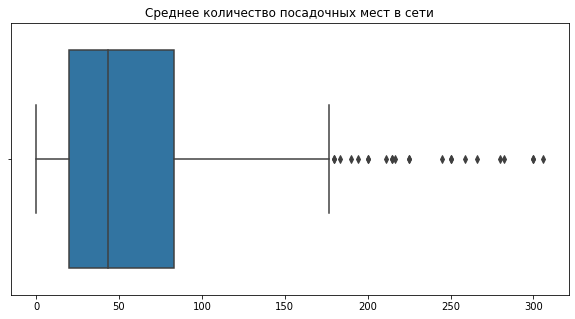

In [18]:
# Поспотрим распределение по среднему количеству посадочных мест
rest_chain = df[df['chain']].groupby(['object_name']).agg(count=('object_type', 'count'), number_mean=('number','mean'))
rest_chain.sort_values('count', ascending=False, inplace=True)

plt.figure(figsize=(10, 5))
plt.title('Среднее количество посадочных мест в сети')
sns.boxplot(x="number_mean", data=rest_chain)
plt.xlabel('')
plt.show()

 Исходя из графиков, нормальным можем принимать от 20 до 90 посадочных мест на объект общественного питания. При максимуме мест в 580 (видим по describe) и учитывая показатели "ящика с усами", приходим к выводу, что все что за 180 - аномалии.  Но посмотрим еще по другим графикамтак ли это.

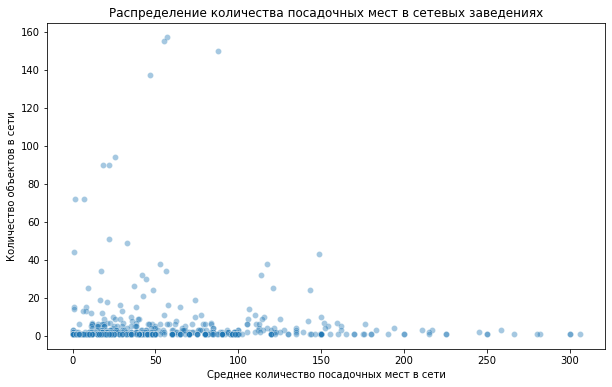

In [19]:
plt.figure(figsize=(10, 6))
plt.title('Распределение количества посадочных мест в сетевых заведениях')
sns.scatterplot(x="number_mean", y="count",
                palette="ch:r=-.2,d=.3_r",
                alpha = 0.4,
                data=rest_chain)
plt.xlabel('Среднее количество посадочных мест в сети')
plt.ylabel('Количество объектов в сети')
plt.show()

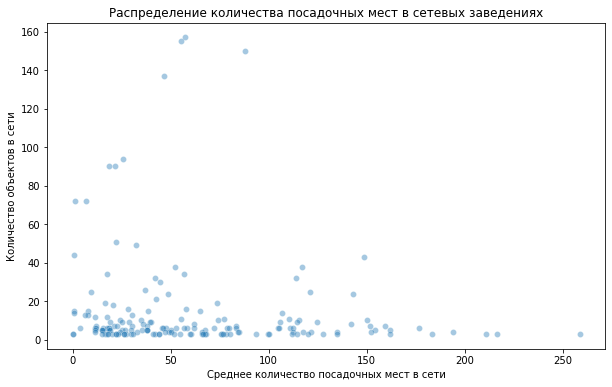

In [20]:
# посмотрим поближе распределение  количеством объектов более 2-х
plt.figure(figsize=(10, 6))

plt.title('Распределение количества посадочных мест в сетевых заведениях')
sns.scatterplot(x="number_mean", y="count",
                palette="ch:r=-.2,d=.3_r",
                alpha = 0.4,
                data=rest_chain[rest_chain['count'] > 2])
plt.xlabel('Среднее количество посадочных мест в сети')
plt.ylabel('Количество объектов в сети')
plt.show()

In [21]:
# посчитаем заведения с нулевым количеством мест и посмотрим на них
object_chain[object_chain['number'] == 0].shape


(265, 5)

In [22]:
# посмотрим на ООП с нулевым количеством посадочных мест
display(object_chain[object_chain['number'] == 0])

,object_name,chain,object_type,address,number
290,кофе с собой,True,предприятие быстрого обслуживания,"город москва, 1-я тверская-ямская улица, дом 1...",0
498,суши сет,True,предприятие быстрого обслуживания,"город москва, краснопрудная улица, дом 22-24",0
504,кофе с собой,True,кафетерий,"город москва, краснохолмская набережная, дом 1...",0
577,кофейня «кофе хаус»,True,кафе,"город москва, павелецкая площадь, дом 1а, стро...",0
938,стардогs,True,предприятие быстрого обслуживания,"город москва, профсоюзная улица, дом 2/22",0
...,...,...,...,...,...
15249,милти,True,магазин (отдел кулинарии),"город москва, дубравная улица, дом 34/29",0
15250,милти,True,магазин (отдел кулинарии),"город москва, пятницкое шоссе, дом 3",0
15251,готовые блюда милти,True,предприятие быстрого обслуживания,"город москва, ореховый бульвар, дом 22а",0
15252,милти,True,предприятие быстрого обслуживания,"город москва, 3-й крутицкий переулок, дом 18",0


### Вывод

Всего сетевых заведений - 2964 единиц. 
Исходя из полученных результатов распределения, можем прийти к выводу, что в преобладающем количестве объекты общественного питания с небольшим количеством филиалов и малым либо  средним количеством посадочных мест.
Крупные сети, редко встречаются, и имеют не более 100 посадочных мест. Стоит также обратить особое внимание, что встречаются сетевые заведения, в которых отсутствуют посадочные места (всего 265 объектов). Как уже указывалось при первоначальном изучении данных, это могут быть объекты, ориентированные на доставку либо на продажу "на вынос" (самовывоз), такие заведения составляют около 10 % от общего количества сетевых объектов.


### Описание среднего количества посадочных мест для каждого вида объекта общественного питания

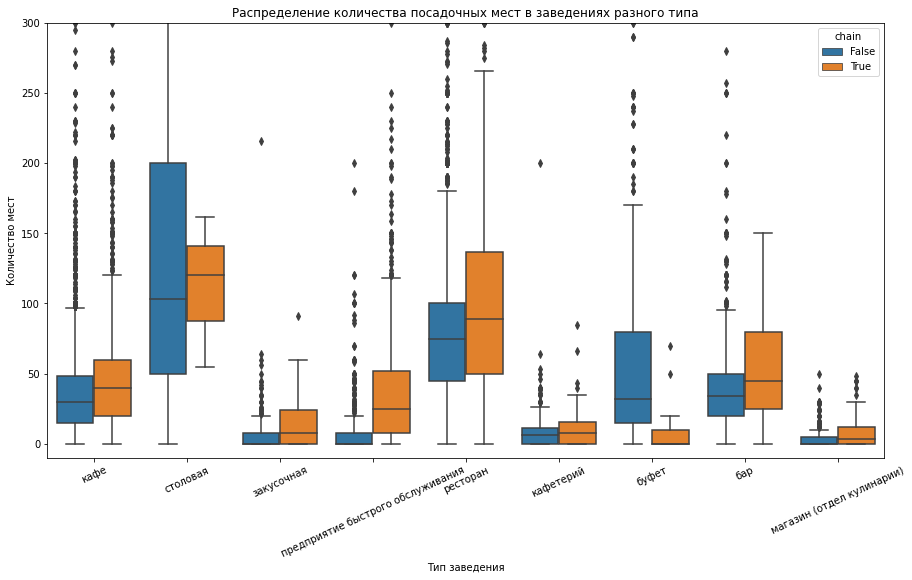

count  number_median
object_type                       chain                      
буфет                             True      11            0.0
закусочная                        False    292            0.0
предприятие быстрого обслуживания False   1109            0.0
магазин (отдел кулинарии)         False    195            0.0
                                  True      78            3.5
кафетерий                         False    343            6.0
закусочная                        True      56            8.0
кафетерий                         True      52            8.0
предприятие быстрого обслуживания True     788           25.0
кафе                              False   4675           30.0
буфет                             False    565           32.0
бар                               False    818           34.0
кафе                              True    1396           40.0
бар                               True      37           45.0
ресторан                          False   1739           75.0
                                  True     543           89.0
столовая                          False   2581          103.0
                                  True       3          120.0

In [23]:
# Посмотрим распределение по видам объекта среднего количества посадочных мест
# для оценки среднего количества посадочных мест используем медиану
plt.figure(figsize=(15, 8))
plt.ylim(-10,300)
plt.title('Распределение количества посадочных мест в заведениях разного типа')
sns.boxplot(x="object_type", y="number", hue="chain", data=df) 
plt.xlabel('Тип заведения')
plt.ylabel('Количество мест') 
plt.xticks(rotation=25)
plt.show()

display(df
        .groupby(['object_type', 'chain'])
        .agg(count=('object_type', 'count'), number_median=('number', 'median')) 
        .sort_values('number_median')
       )

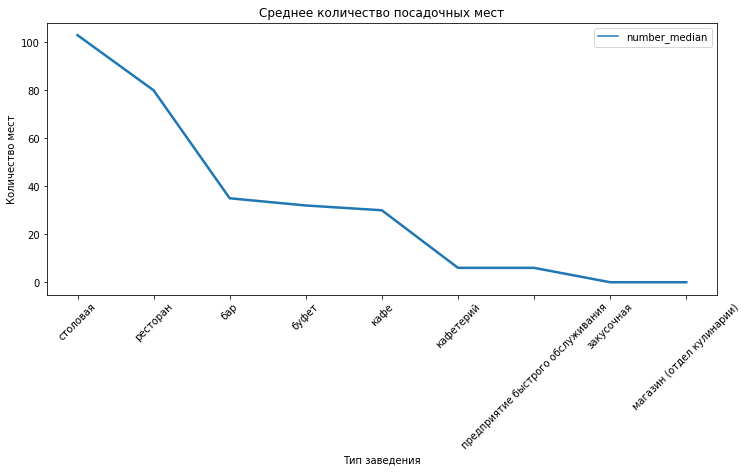

,number_median
object_type,
столовая,103
ресторан,80
бар,35
буфет,32
кафе,30
кафетерий,6
предприятие быстрого обслуживания,6
закусочная,0
магазин (отдел кулинарии),0


In [24]:

rest_number_median = (df
                      .groupby(['object_type'])
                      .agg(number_median=('number', 'median'))
                      .sort_values('number_median', ascending=False)
                     )
plt.figure(figsize=(12, 5))
plt.title('Среднее количество посадочных мест')
sns.lineplot(data=rest_number_median, palette="tab10", linewidth=2.5, sort=False)
plt.xlabel('Тип заведения')
plt.ylabel('Количество мест') 
plt.xticks(rotation=45)
plt.show()

display(rest_number_median)

### Вывод

На первом месте по количеству посадочных мест в среднем - столовые (103), на втором - рестораны (80).
Затем по убыванию количества мест идут бары (35), буфеты (32) и кафе (30).
Кафетерии (6) и предприятия быстрого обслуживания (6) предоставляют в среднем очень небольшое количество мест для посетителей.
В закусочных и магазинах посадочных мест в среднем отсутствуют.



### Выделение в отдельный столбец информации об улице из столбца address 

In [25]:
#([А-яё0-9\s]+)? - любое количество цифр букв пробелов предшествующие словам улица|переулок|шоссе|площадь|проспект|проезд|бульвар|набережная|микрорайон|аллея|квартал|линия|тупик
# (улица|переулок) ключевые слова
# ([А-яё0-9\s]+)? любое количество цифр букв пробелов идущих сразу за словам улица|переулок|шоссе|площадь|проспект|проезд|бульвар|набережная|микрорайон|аллея|квартал|линия|тупик
df['street_name'] = (df['address'].str.extract('(([А-яё0-9\s\-]+)?(улица|переулок|шоссе|площадь|проспект|проезд|бульвар|набережная|микрорайон|аллея|квартал|линия|тупик)([А-яё0-9\s]+)?)')[0])

# .str.strip() Метод str.strip() вернет копию строки str с удаленными начальными и конечными символами chars. 
# Другими словами, обрежет строку str с обоих концов. Аргумент chars - это строка, указывающая набор удаляемых символов. 
# Если аргумент chars не задан или None, то по умолчанию удалит пробелы с обоих концов строки.

df['street_name'] = df['street_name'].str.strip()
display(df.head(10))

,object_name,chain,object_type,address,number,street_name
0,сметана,False,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,родник,False,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,кафе «академия»,False,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,пиццетория,True,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,кафе «вишневая метель»,False,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица
5,стол. при гоу сош № 1051,False,столовая,"город москва, абрамцевская улица, дом 15, корп...",240,абрамцевская улица
6,брусника,True,кафе,"город москва, переулок сивцев вражек, дом 6/2",10,переулок сивцев вражек
7,буфет мтуси,False,столовая,"город москва, авиамоторная улица, дом 8, строе...",90,авиамоторная улица
8,кпф семья-1,False,столовая,"город москва, авиамоторная улица, дом 8, строе...",150,авиамоторная улица
9,столовая мтуси,False,столовая,"город москва, авиамоторная улица, дом 8, строе...",120,авиамоторная улица


In [26]:
# посмотрим, появились ли пропуски
display(df[df['street_name'].isna()])

,object_name,chain,object_type,address,number,street_name
1405,это,False,кафе,"город москва, город зеленоград, корпус 401",35,NaN
1406,френдс,False,кафе,"город москва, город зеленоград, корпус 435",34,NaN
1407,кафе «граф монте-кристо»,False,кафе,"город москва, город зеленоград, корпус 436",40,NaN
1408,альфорно,False,кафе,"город москва, город зеленоград, корпус 438",49,NaN
1409,альфорно,False,кафе,"город москва, город зеленоград, корпус 438",45,NaN
...,...,...,...,...,...,...
14898,кафе,False,буфет,"город москва, поселение десеновское, деревня в...",10,NaN
14914,шашлычный дворик,False,кафе,"город москва, поселение десеновское, деревня в...",15,NaN
14915,кафе «сахли»,False,закусочная,"город москва, поселение десеновское, деревня в...",10,NaN
14932,газпромнефть,False,кафе,"поселение ""мосрентген"", деревня дудкино, владе...",20,NaN


Появились пропуски в столбце названий улиц, в количестве 320 ед., но это не критично и допустимо, так как при заполнении данных возможны пропуски в данной информации.

### Определение топ-10 улиц по количеству объектов общественного питания и с использованием внешней информации определить районы их нахождения

In [27]:
# загрузим внешние данные по распередению улиц по округам из сайта Мосгаз, для дальнейшей работы и сохраним в переменную, проверим
new_df_street = pd.read_csv('https://frs.noosphere.ru/xmlui/bitstream/handle/20.500.11925/714058/mosgaz-streets.csv?sequence=1&isAllowed=y')
print(new_df_street.head())

                        streetname  areaid okrug               area
0             Выставочный переулок      17   ЦАО  Пресненский район
1                     улица Гашека      17   ЦАО  Пресненский район
2          Большая Никитская улица      17   ЦАО  Пресненский район
3                Глубокий переулок      17   ЦАО  Пресненский район
4  Большой Гнездниковский переулок      17   ЦАО  Пресненский район


In [28]:
# находим топ-10 улиц с наибольшим количеством заведений
temp = df.groupby('street_name').count().sort_values(by='object_type', ascending=False).head(10).reset_index()
top_10 = list(temp['street_name'])
temp

,street_name,object_name,chain,object_type,address,number
0,проспект мира,203,203,203,203,203
1,профсоюзная улица,182,182,182,182,182
2,ленинградский проспект,172,172,172,172,172
3,пресненская набережная,167,167,167,167,167
4,варшавское шоссе,165,165,165,165,165
5,ленинский проспект,148,148,148,148,148
6,проспект вернадского,128,128,128,128,128
7,кутузовский проспект,114,114,114,114,114
8,каширское шоссе,111,111,111,111,111
9,кировоградская улица,108,108,108,108,108


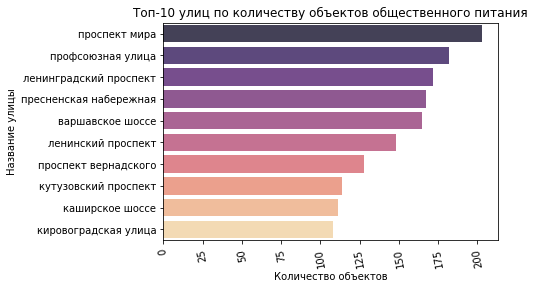

In [29]:
# построим график
ax = sns.barplot(x='object_type', y='street_name', data=temp, palette="magma", alpha=.8, orient='h')
ax.set_xlabel('Количество объектов')
ax.set_ylabel('Название улицы')
ax.set_title('Топ-10 улиц по количеству объектов общественного питания')
plt.xticks(rotation=100)
plt.show()



Определим районы Москвы, в которых находятся эти улицы? с помощью внешних данных, сохраненных в переменной 'new_df_street'.

In [30]:
# добавляем информацию о районах для топ-10 улиц
new_df_street['streetname'] = new_df_street['streetname'].str.lower()
new_df_street['streetname'] = new_df_street['streetname'].str.strip()

new_df_street.head()
 




,streetname,areaid,okrug,area
0,выставочный переулок,17,ЦАО,Пресненский район
1,улица гашека,17,ЦАО,Пресненский район
2,большая никитская улица,17,ЦАО,Пресненский район
3,глубокий переулок,17,ЦАО,Пресненский район
4,большой гнездниковский переулок,17,ЦАО,Пресненский район


In [31]:
rest_by_street = temp.merge(new_df_street, how='left', left_on='street_name', right_on='streetname')
#rest_by_street = rest_by_street.rename(columns={'street_name':'count_object'})
rest_by_street = rest_by_street.drop(['streetname', 'areaid', 'object_name', 'chain', 'object_type', 'address', 'number'], axis=1)
display(rest_by_street)


,street_name,okrug,area
0,проспект мира,СВАО,Алексеевский район
1,проспект мира,СВАО,Ярославский Район
2,проспект мира,СВАО,Район Марьина роща
3,проспект мира,СВАО,Останкинский район
4,проспект мира,СВАО,Район Ростокино
5,проспект мира,СВАО,Район Свиблово
6,проспект мира,ЦАО,Мещанский район
7,профсоюзная улица,ЮЗАО,Академический район
8,профсоюзная улица,ЮЗАО,Район Черемушки
9,профсоюзная улица,ЮЗАО,Район Ясенево


Исходя из вышеуказанной таблицы, в Топ-10  по количеству расположенных на них объектов общественного питания, попадают самые длинные улицы Москвы, которые проходят через несколько районов, иногда округов. 

In [32]:
# рассмотрим через какие округа проходят самые богатые на общепит улицы
okrug_top10 = pd.DataFrame(rest_by_street.groupby('okrug')['street_name'].nunique().reset_index()) 

# все возможные округа
okrug_total = pd.DataFrame(new_df_street.groupby('okrug')['streetname'].count().reset_index())

# все районы по округам:
district_total = pd.DataFrame(new_df_street.groupby(['okrug', 'area'])['streetname'].count().reset_index())

# собираем  для наглядности:
rep_okrug_top10 = okrug_top10.merge(okrug_total, how='right', left_on='okrug', right_on='okrug')
rep_okrug_top10 = rep_okrug_top10.drop(['streetname'], axis=1)
rep_okrug_top10['street_count'] = rep_okrug_top10['street_name'].fillna(0).astype('int32')
rep_okrug_top10.sort_values('street_count', ascending=False, inplace=True)


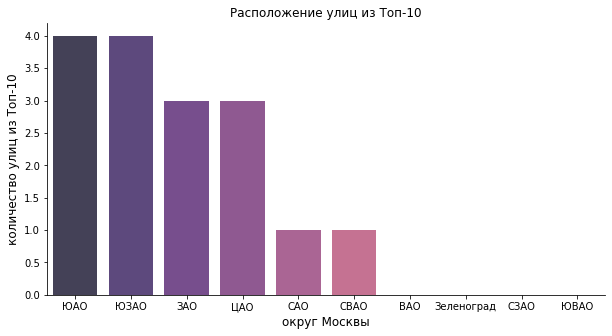

,okrug,street_name,street_count
7,ЮАО,4.0,4
9,ЮЗАО,4.0,4
1,ЗАО,3.0,3
6,ЦАО,3.0,3
3,САО,1.0,1
4,СВАО,1.0,1
0,ВАО,NaN,0
2,Зеленоград,NaN,0
5,СЗАО,NaN,0
8,ЮВАО,NaN,0


In [33]:
# изобразим на графике
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='okrug', y='street_name', data=rep_okrug_top10, palette="magma", alpha=.8)
ax.set_title('Расположение улиц из Топ-10')
ax.set_xlabel('округ Москвы', fontsize = 12) 
ax.set_ylabel('количество улиц из Топ-10', fontsize = 12) 
sns.despine()
plt.show()

display(rep_okrug_top10)

### Вывод

В топ-10 улиц, на которых расположено самое большое количество объектов общественного питания входят (в порядке убывания количества объектов):
    проспект мира, профсюзная улица,ленинградский проспект, пресненская набережная, варшавское шоссе, ленинский проспект, проспект вернадского, кутузовский проспект, каширское шоссе, кировоградская улица.  
    Исходя из вышеуказанного, в Топ-10 попадают самые длинные улицы Москвы, которые проходят через несколько районов, иногда округов. 
    Самыми насыщенными по расположению заведений общественного питания являются следующие районы города Москвы Северо-Восточного административного округа: Алексеевский район, Ярославский Район, Район Марьина роща, Останкинский район, Район Ростокино, Район Свиблово, 	Мещанский район Центрального административного округа. Самые насыщенные улицами, которые попали в топ-10 по количеству заведений, являются Южный административный округ и Юго-Западный АО г. Москвы. 
    

### Определение числа улиц с одним объектом общественного питания с использованием внешней информации

In [34]:
temp_one = df.groupby('street_name').count().sort_values(by='object_type', ascending=False).reset_index()


In [35]:
# формируем таблицу с улицами, в которых расположен один объект общественного питания используя внешние данные
rest_one_street = temp_one.merge(new_df_street, how='left', left_on='street_name', right_on='streetname')
rest_one_streets = rest_one_street[rest_one_street['address'] == 1]

rest_one_streets = rest_one_streets.rename(columns={'address':'count_object'})
rest_one_streets = rest_one_streets.drop(['streetname', 'areaid', 'object_name', 'chain', 'object_type', 'number'], axis=1)

display(rest_one_streets)

,street_name,count_object,okrug,area
1802,улица паперника,1,ЮВАО,Рязанский район
1803,улица маршала новикова,1,СЗАО,Район Щукино
1804,улица можайский вал,1,ЗАО,Район Дорогомилово
1805,улица подвойского,1,ЦАО,Пресненский район
1806,алымов переулок,1,ВАО,Район Богородское
...,...,...,...,...
2386,улица академика понтрягина,1,ЮЗАО,Район Южное Бутово
2387,улица академика семенова,1,NaN,NaN
2388,докучаев переулок,1,ЦАО,Красносельский район
2389,улица алексея дикого,1,ВАО,Район Новогиреево


Всего таких улиц 589 единиц. Посмотрим как они распределены по районам (округам) города Москвы.

In [36]:
# Посмотрим, через какие округа проходят самые определенные общепитом улицы
okrug_one_rest = pd.DataFrame(rest_one_streets.groupby('okrug')['street_name'].nunique().reset_index()) 

# Добавим для наглядности остальные округа:
rep_okrug_one_rest = okrug_one_rest.merge(okrug_total, how='right', left_on='okrug', right_on='okrug')
rep_okrug_one_rest = rep_okrug_one_rest.drop(['streetname'], axis=1)
rep_okrug_one_rest = rep_okrug_one_rest.rename(columns = {'street_name':'count_object'})
rep_okrug_one_rest.sort_values('count_object', ascending=False, inplace=True)

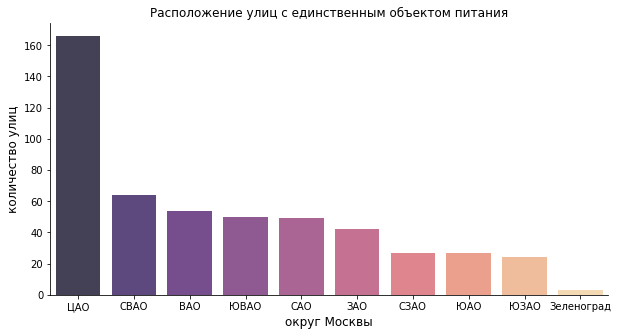

,okrug,count_object,percent
6,ЦАО,166,32.81
4,СВАО,64,12.65
0,ВАО,54,10.67
8,ЮВАО,50,9.88
3,САО,49,9.68
1,ЗАО,42,8.30
5,СЗАО,27,5.34
7,ЮАО,27,5.34
9,ЮЗАО,24,4.74
2,Зеленоград,3,0.59


In [37]:
# построим график
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='okrug', y='count_object', data=rep_okrug_one_rest, palette="magma", alpha=.8)
ax.set_title('Расположение улиц с единственным объектом питания')
ax.set_xlabel('округ Москвы', fontsize = 12) 
ax.set_ylabel('количество улиц', fontsize = 12) 
sns.despine()
plt.show()

rep_okrug_one_rest['percent'] = round((rep_okrug_one_rest['count_object'] / rep_okrug_one_rest['count_object'].sum()) * 100, 2)
rep_okrug_one_rest

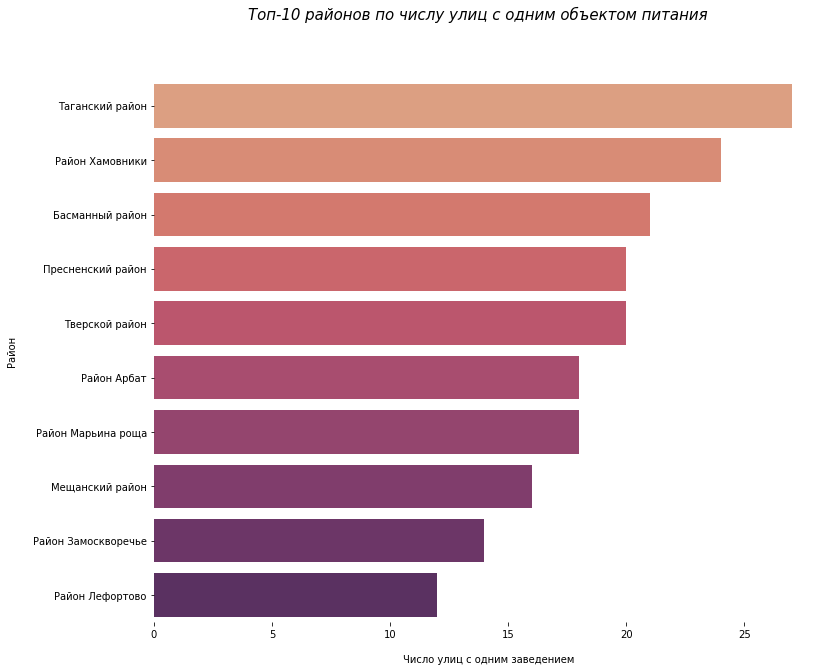

In [38]:
# Создадим график и посмотрим как распределилось количество улиц в которых только один объект ОП
# определим первую десятку районов г. Москвы по количеству улиц в которых одтг объект
one_rest_street_by_district = (
    rest_one_streets.groupby('area')
                            .agg({'street_name':'count'})
                            .rename(columns={'street_name': 'number_of_streets'})
                            .sort_values('number_of_streets', ascending=False)
)
# строим график
fig, ax = plt.subplots(figsize=(12,10))
fig.suptitle('Топ-10 районов по числу улиц с одним объектом питания', fontsize=15, style="italic")

# отрисовываем график
sns.barplot(y=one_rest_street_by_district.head(10).index,
            x='number_of_streets',
            data=one_rest_street_by_district.head(10), palette='flare')

sns.despine(left=True, bottom=True)

ax.set_ylabel('Район\n')
ax.set_xlabel('\nЧисло улиц с одним заведением');


### Вывод

Всего в г. Москва улиц, на которых расположен только один объект общественного питания - 589 единиц. В преобладающем большинстве - 32 % от общего числа, они расположены в Центральном административном округе. Таганский район, Хамовники и Басманный районы г. Москвы являются лидерами среди районов, в которых находятся улицы с одним объектом общественного питания.

### Изучение распределения количества посадочных мест для улиц с большим количеством объектов общественного питания. Выявление закономерностей

In [39]:

# добавляем информацию о количестве посадочных мест
top10_rest = df[df['street_name'].isin(rest_by_street['street_name'].unique())]


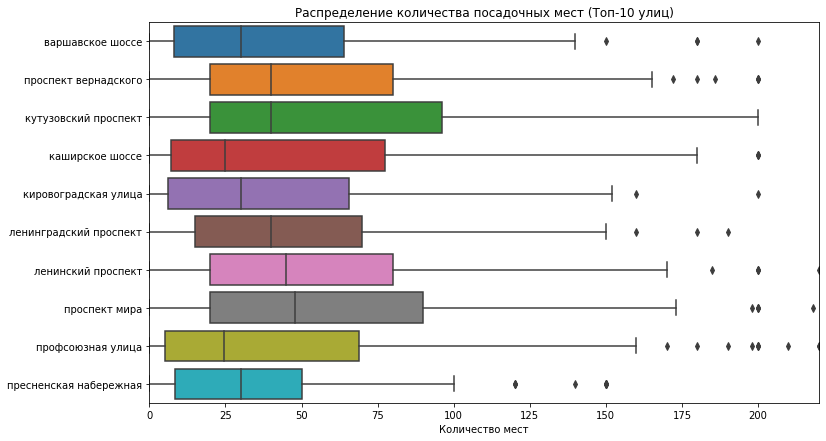

In [40]:
# посмотрим распределение по "ящикам с усами"
plt.figure(figsize=(12, 7))
plt.xlim(0,220)
plt.title('Распределение количества посадочных мест (Топ-10 улиц)')

sns.boxplot(x="number", y="street_name", data=top10_rest, orient='h') 
plt.xlabel('Количество мест')
plt.ylabel('') 
plt.show()

In [41]:
rest_number_max = df.groupby('street_name').agg({'number':'sum'})
display(rest_number_max.head())

,number
street_name,
1-й автозаводский проезд,114
1-й амбулаторный проезд,140
1-й балтийский переулок,60
1-й басманный переулок,50
1-й ботанический проезд,40


In [42]:
# создаем сводную таблицу по количеству улиц и посадочных мест относительно улиц с самым большим количеством объектов ОП
rest_top10_street_number_max = rest_by_street.merge(rest_number_max, on='street_name')

display(rest_top10_street_number_max)

,street_name,okrug,area,number
0,проспект мира,СВАО,Алексеевский район,12790
1,проспект мира,СВАО,Ярославский Район,12790
2,проспект мира,СВАО,Район Марьина роща,12790
3,проспект мира,СВАО,Останкинский район,12790
4,проспект мира,СВАО,Район Ростокино,12790
5,проспект мира,СВАО,Район Свиблово,12790
6,проспект мира,ЦАО,Мещанский район,12790
7,профсоюзная улица,ЮЗАО,Академический район,8667
8,профсоюзная улица,ЮЗАО,Район Черемушки,8667
9,профсоюзная улица,ЮЗАО,Район Ясенево,8667


Проверим гипотезу о равенстве среднего количества посадочных мест на улицах из Топ-10 и остальных улицах базы, т.е. о равенстве двух независимых выборок. Т.к. распределения средних значений отличаются от нормального и они не зависят между собой, воспользуемся критерием Манна-Уитни. Нулевая гипотеза сформулируем так: Н0 - количество посадочных мест на улицах с самым большим количеством объектов общественного питания не отличается от количества посадочных мест на иных улицах города Москвы.

In [43]:
top10_number = top10_rest['number'].values

df_number = df[~df['street_name'].isin(rest_by_street['street_name'].unique())]['number'].values

alpha = .05 # критический уровень статистической значимости

results = st.mannwhitneyu(top10_number, df_number)

print('\033[1mНулевая гипотеза H0: количество посадочных мест не отличается\033[0m')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Нулевая гипотеза H0: количество посадочных мест не отличается
p-значение:  0.11619537962076892
Не получилось отвергнуть нулевую гипотезу


### Вывод

При изучении таблицы и распределения, мы увидели, что относительно топ-1 мы увидели полную корреляцию количества обьектов с количеством посадочных мест на Проспекте мира. Но также наблюдались небольшие расхождения относительно корреляции количества посадочных мест на улицах с самым высоким количеством объектов общественного питания. Применив проверку гипотезы, мы смогли подтвердить, что количество посадочных мест в заведениях на улицах с самым высоким количеством объектов не отличается от количества посадочных мест в заведениях ОП в других районах г. Москва.

Таким образом, у нас нет оснований считать, что среднее количество посадочных мест в заведениях общепита на улицах из Топ-10 отличается от среднего количества мест по остальной базе



## Вывод

При проведении исследования приходим к выводу, что самым перспективным типом объекта общественного питания (далее - ООП) является кафе. Так, данному формату  ООП соответствует наибольшее кличество сетевых заведений, а также формат кафе является одним из лидеров в процентном соотношении к общему количеству заведений данного вида.  

Стоит выделить абсолютного лидера в долевом отношении сетевых заведений к общему количеству - это предприятия быстрого обслуживания (41,13 %), на втором месте магазины (отдел кулинарии) - 28,57 %, и на третьем рестораны (23,81 %). Кафе на четвертом месте в процентном соотношении к общему количеству заведений данного типа (22,89 %)Пятерку замыкают закусочные (15,56 %). 

Исходя из графиков, основным количеством посадочных мест и самым распространенным является количество от 20 до 90 мест на объект общественного питания. количество посадочных мест в ООП распределяются следующим образом: на первом месте по количеству посадочных мест в среднем - столовые (103), на втором - рестораны (80). Затем по убыванию количества мест идут бары (35), буфеты (32) и кафе (30). Кафетерии (6) и предприятия быстрого обслуживания (5) предоставляют в среднем очень небольшое количество мест для посетителей. 


В топ-10 улиц, на которых расположено самое большое количество объектов общественного питания входят (в порядке убывания количества объектов): проспект мира, профсюзная улица,ленинградский проспект, пресненская набережная, варшавское шоссе, ленинский проспект, проспект вернадского, кутузовский проспект, каширское шоссе, кировоградская улица.
Исходя из вышеуказанного, в Топ-10 попадают самые длинные улицы Москвы, которые проходят через несколько районов, иногда округов. Самыми насыщенными по расположению заведений общественного питания являются следующие районы города Москвы Северо-Восточного административного округа: Алексеевский район, Ярославский Район, Район Марьина роща, Останкинский район, Район Ростокино, Район Свиблово, Мещанский район Центрального административного округа. Самые насыщенные улицами, которые попали в топ-10 по количеству заведений, являются Южный административный округ и Юго-Западный АО г. Москвы. Всего в г. Москва улиц, на которых расположен только один объект общественного питания - 589 единиц. В преобладающем большинстве - 32 % от общего числа, они расположены в Центральном административном округе. Таганский район, Хамовники и Басманный районы г. Москвы являются лидерами среди районов, в которых находятся улицы с одним объектом общественного питания.
Среднее количество посадочных мест в заведениях общепита на улицах из Топ-10 отличается от среднего количества мест по остальной базе. 

Исходя из вышеизложенного, самым перспективным типом ООП для старта проекта является - кафе, с ориентировочным количеством посадочных мест - около 30 ед. Для поиска объекта недвижимости следует выбрать следующие районы города Москвы Северо-Восточного административного округа: Алексеевский район, Ярославский Район, Район Марьина роща, Останкинский район, Район Ростокино, Район Свиблово, Мещанский район Центрального административного округа. Изучая опыт конкурентов, приходим к выводу, что именно такой формат ООП масштабируется чаще, чем, иные форматы, т.е. доказана возможность развития сети в будущем.





## Презентация

https://disk.yandex.ru/d/SgGUHK57sD5lYA